In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("Jamsedpur.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,WS2M,T2M,RH2M,PRECTOTCORR,WD50M,WS10M_RANGE,PS
0,2011,1,1,2.61,17.81,67.12,0.0,316.62,3.52,98.42
1,2011,1,2,1.73,14.90,53.88,0.0,231.12,2.16,98.64
2,2011,1,3,1.66,13.65,53.81,0.0,270.38,1.41,98.83
3,2011,1,4,1.73,12.84,56.19,0.0,285.75,1.39,98.82
4,2011,1,5,1.55,13.43,52.44,0.0,266.38,1.98,98.69
...,...,...,...,...,...,...,...,...,...,...
3738,2021,3,27,1.34,28.87,25.81,0.0,163.69,1.78,98.24
3739,2021,3,28,1.35,29.33,35.44,0.0,158.62,1.73,98.08
3740,2021,3,29,1.91,30.60,32.56,0.0,224.44,4.18,97.85
3741,2021,3,30,2.80,31.90,21.62,0.0,268.69,7.34,97.46


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 10
Discrete feature Count 3
Continuous feature Count 7
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
WS2M           0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
WD50M          0.0
WS10M_RANGE    0.0
PS             0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'WS2M', 'T2M', 'RH2M', 'PRECTOTCORR', 'WD50M', 'WS10M_RANGE', 'PS']


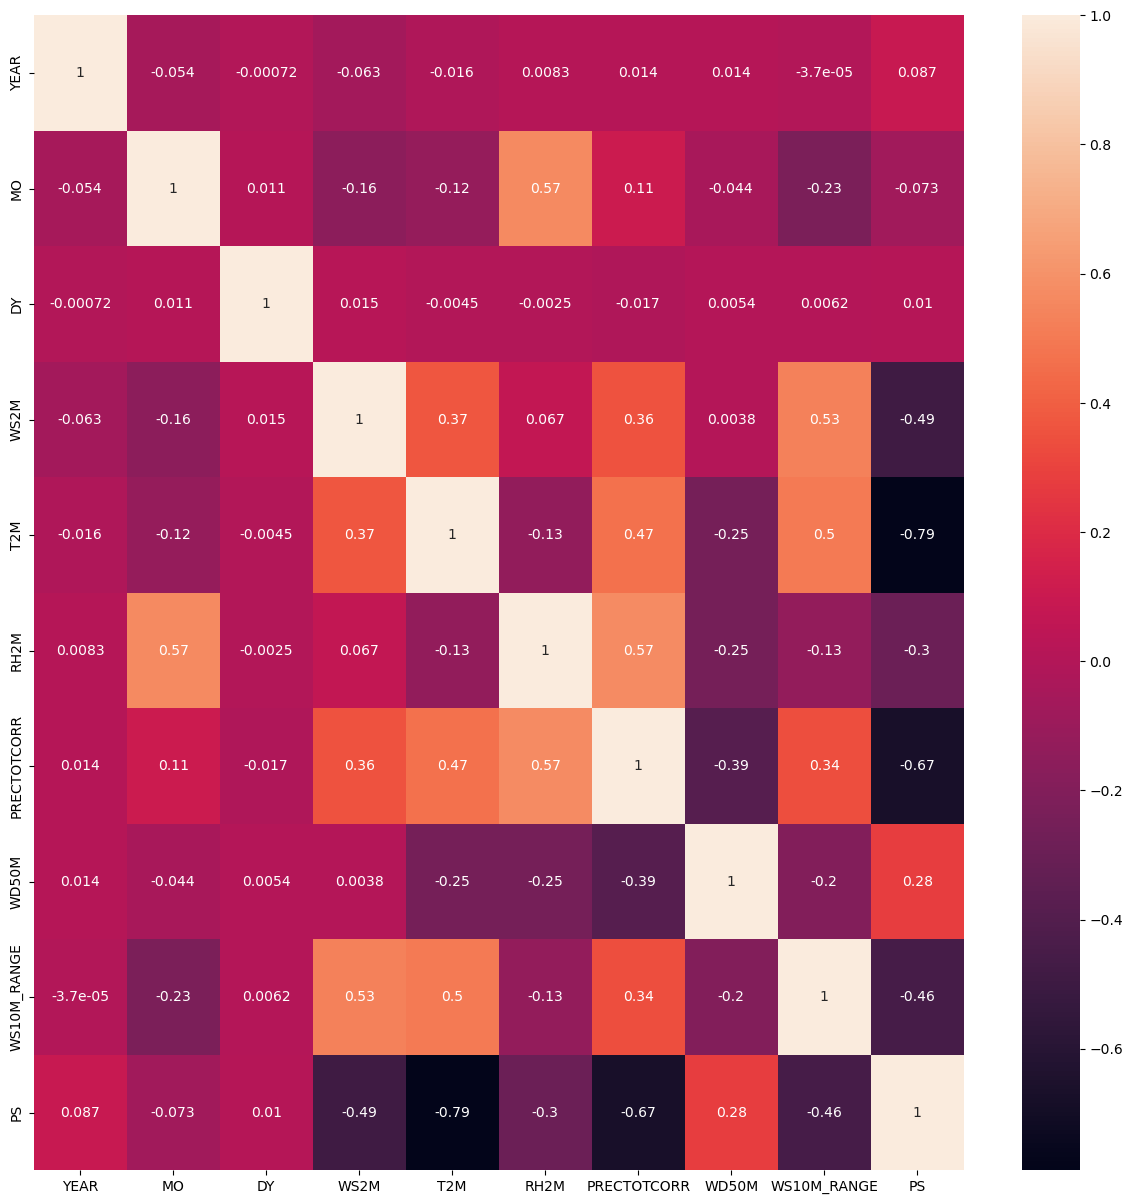

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

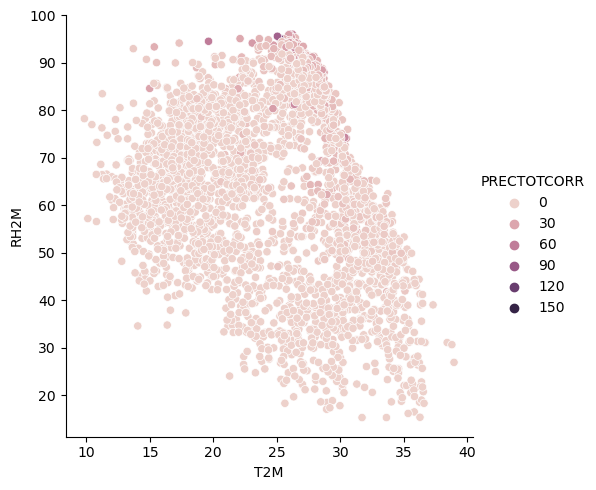

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


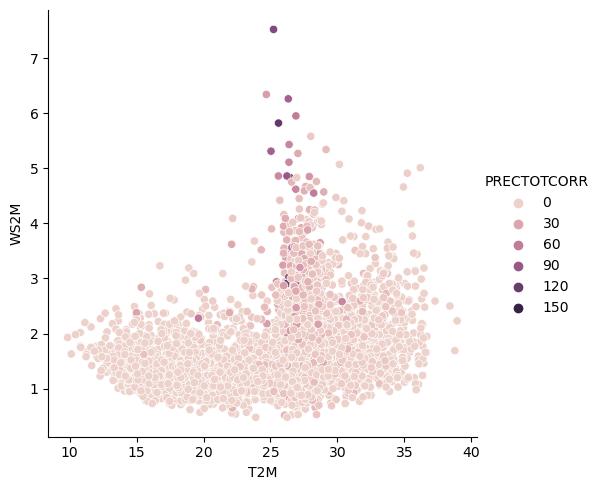

In [9]:
sns.relplot(x='T2M',y='WS2M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


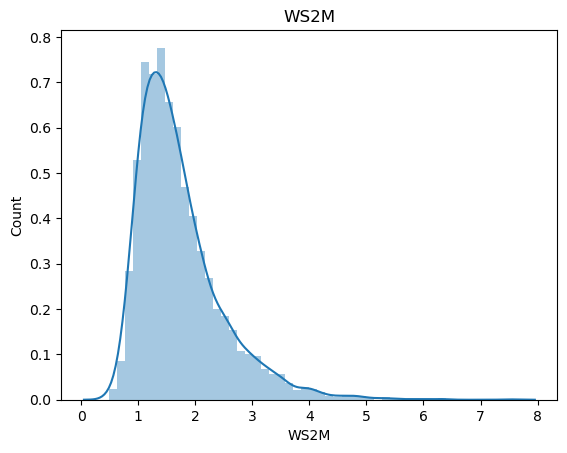

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


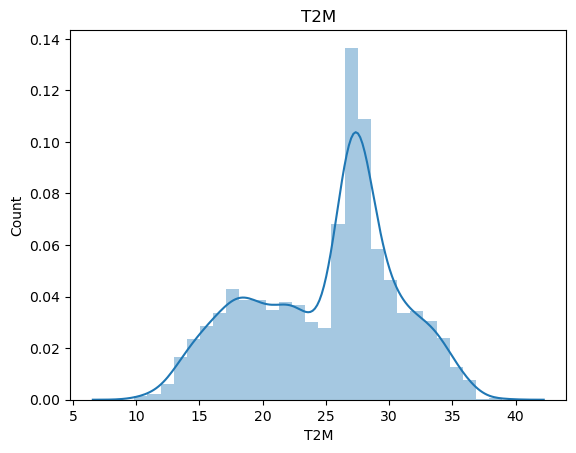

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


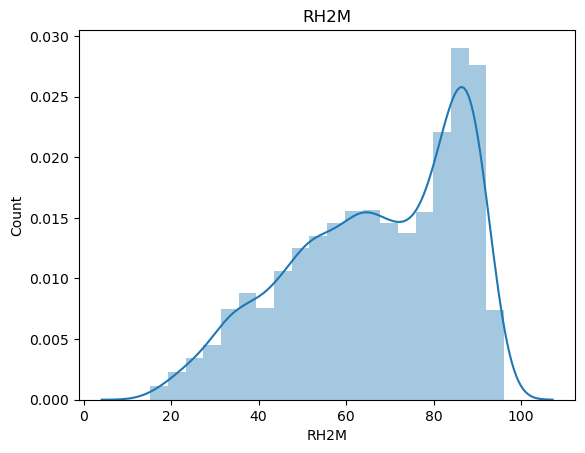

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


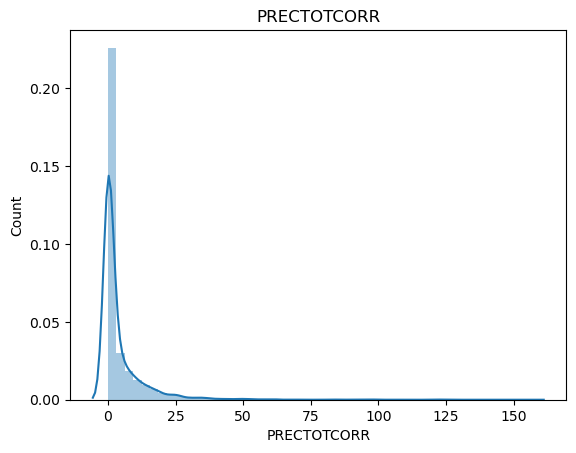

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


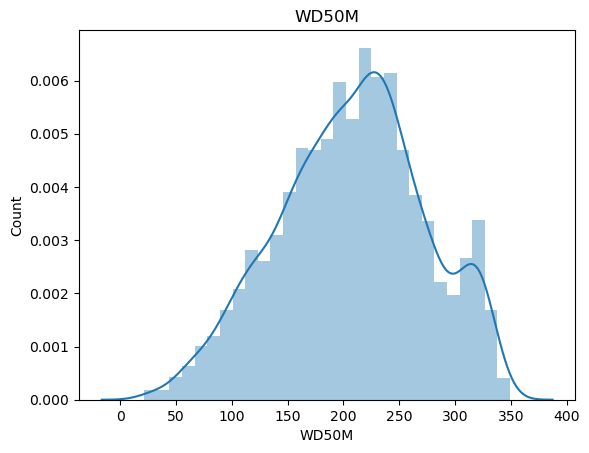

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


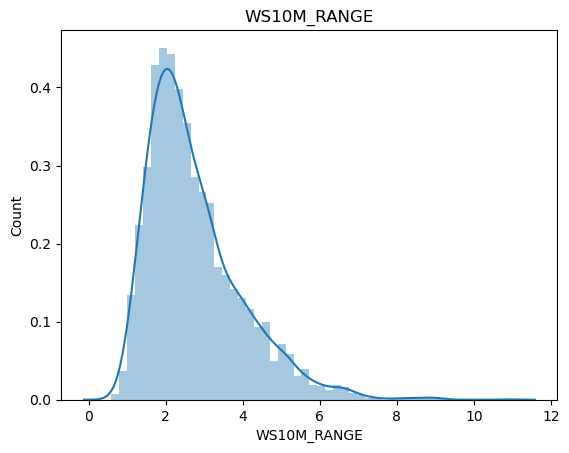

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


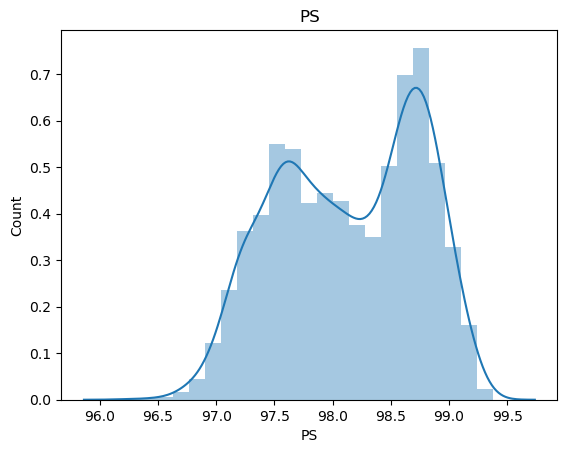

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

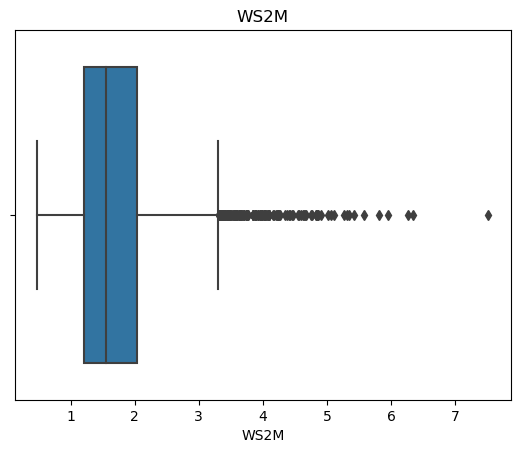

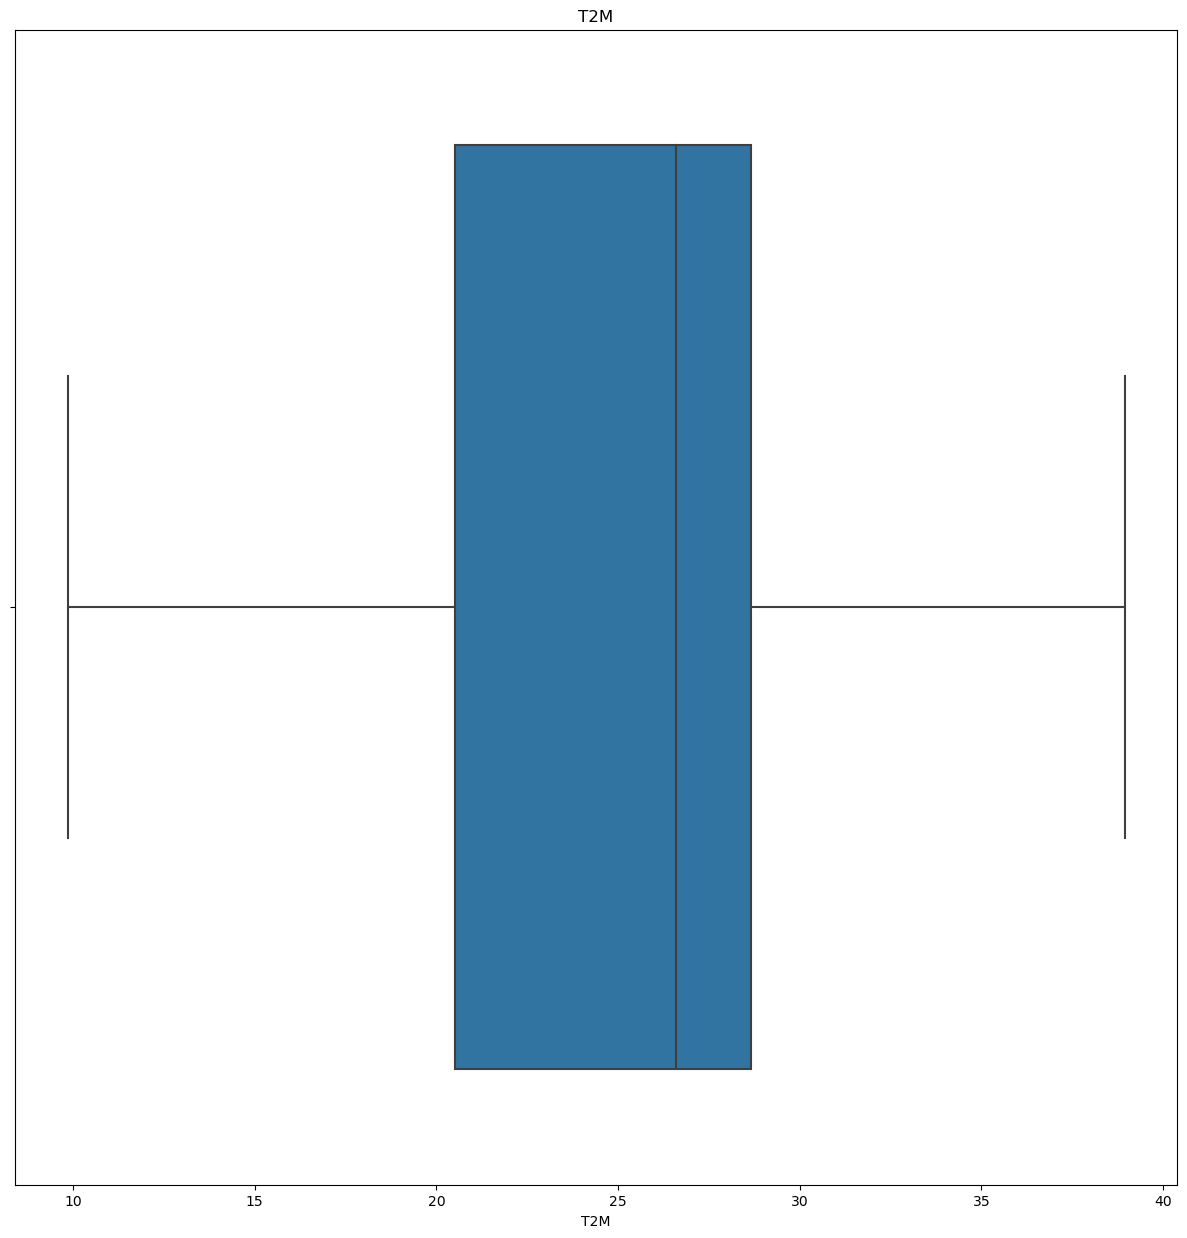

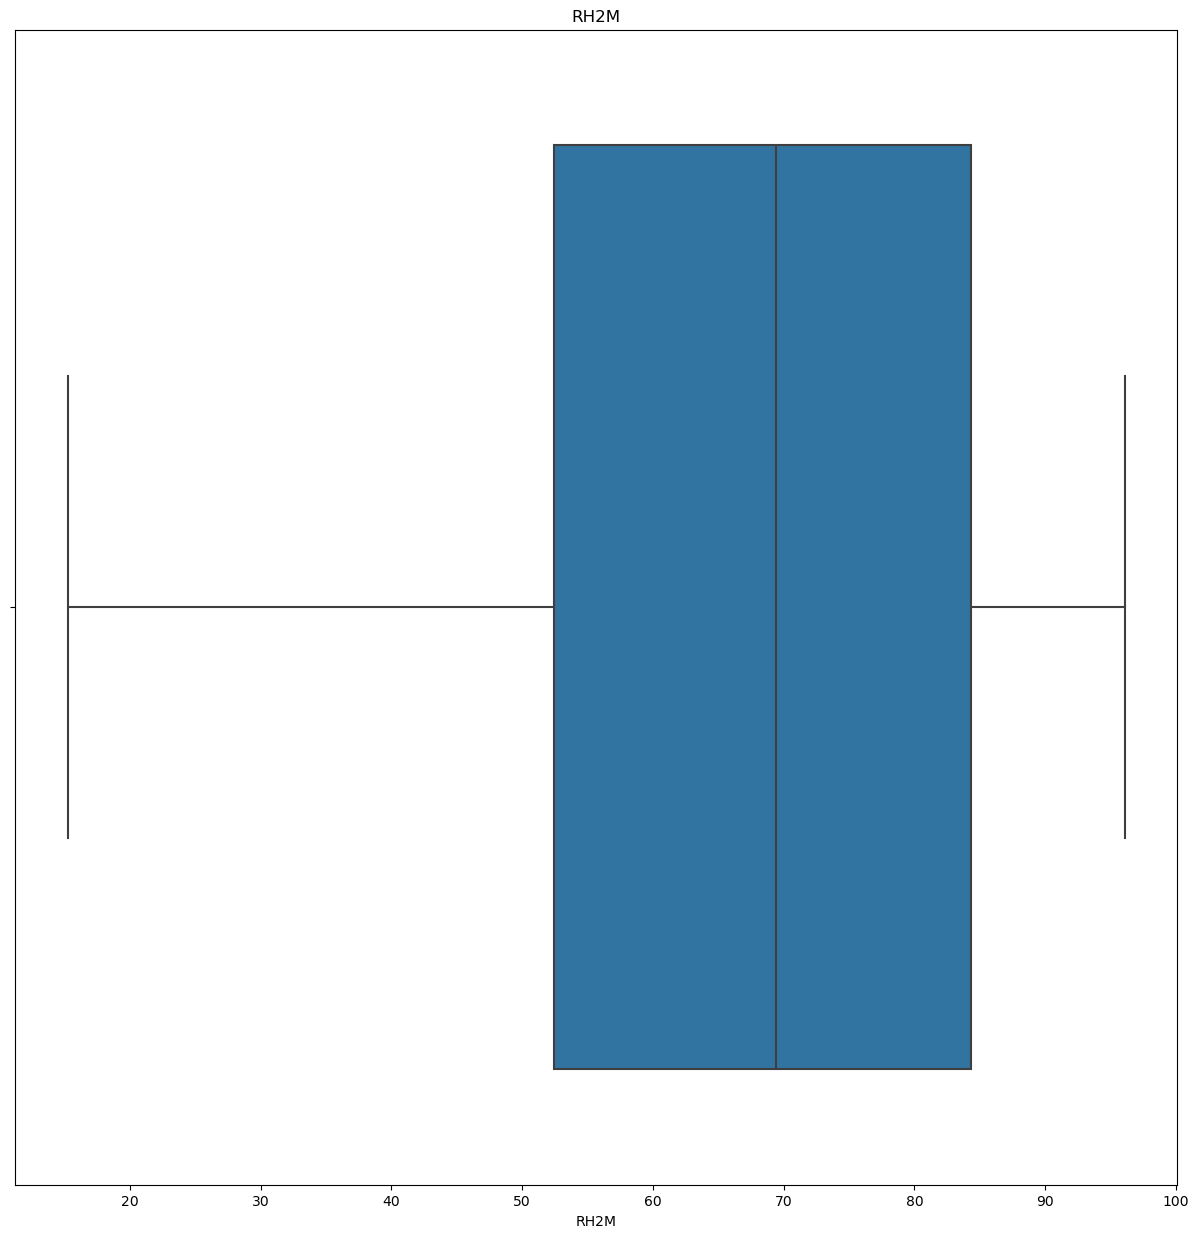

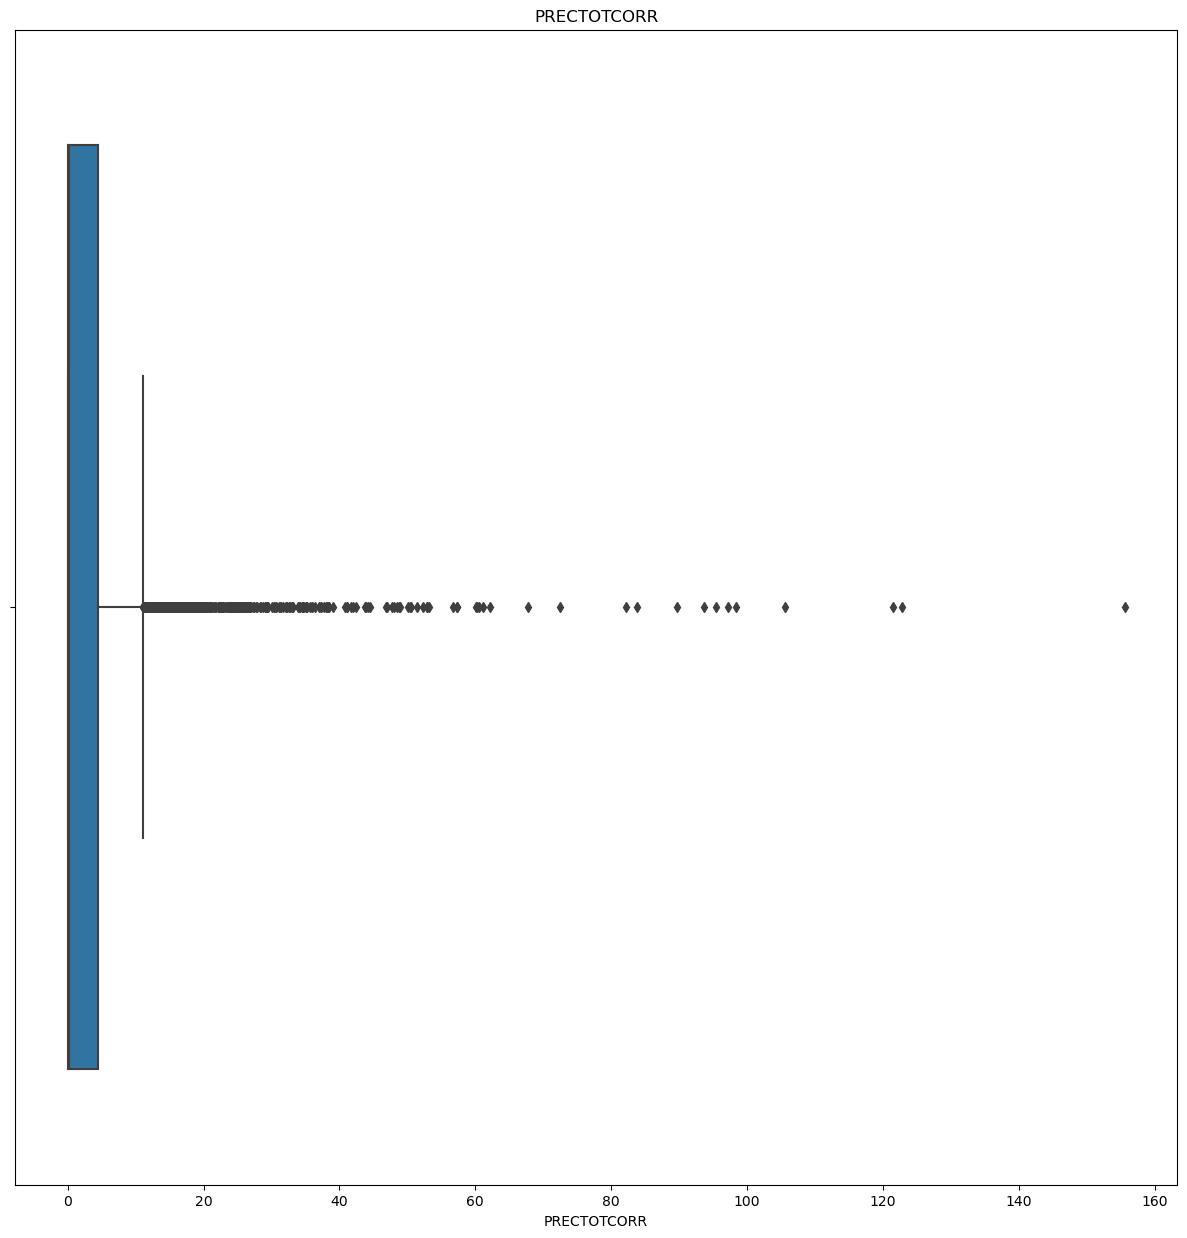

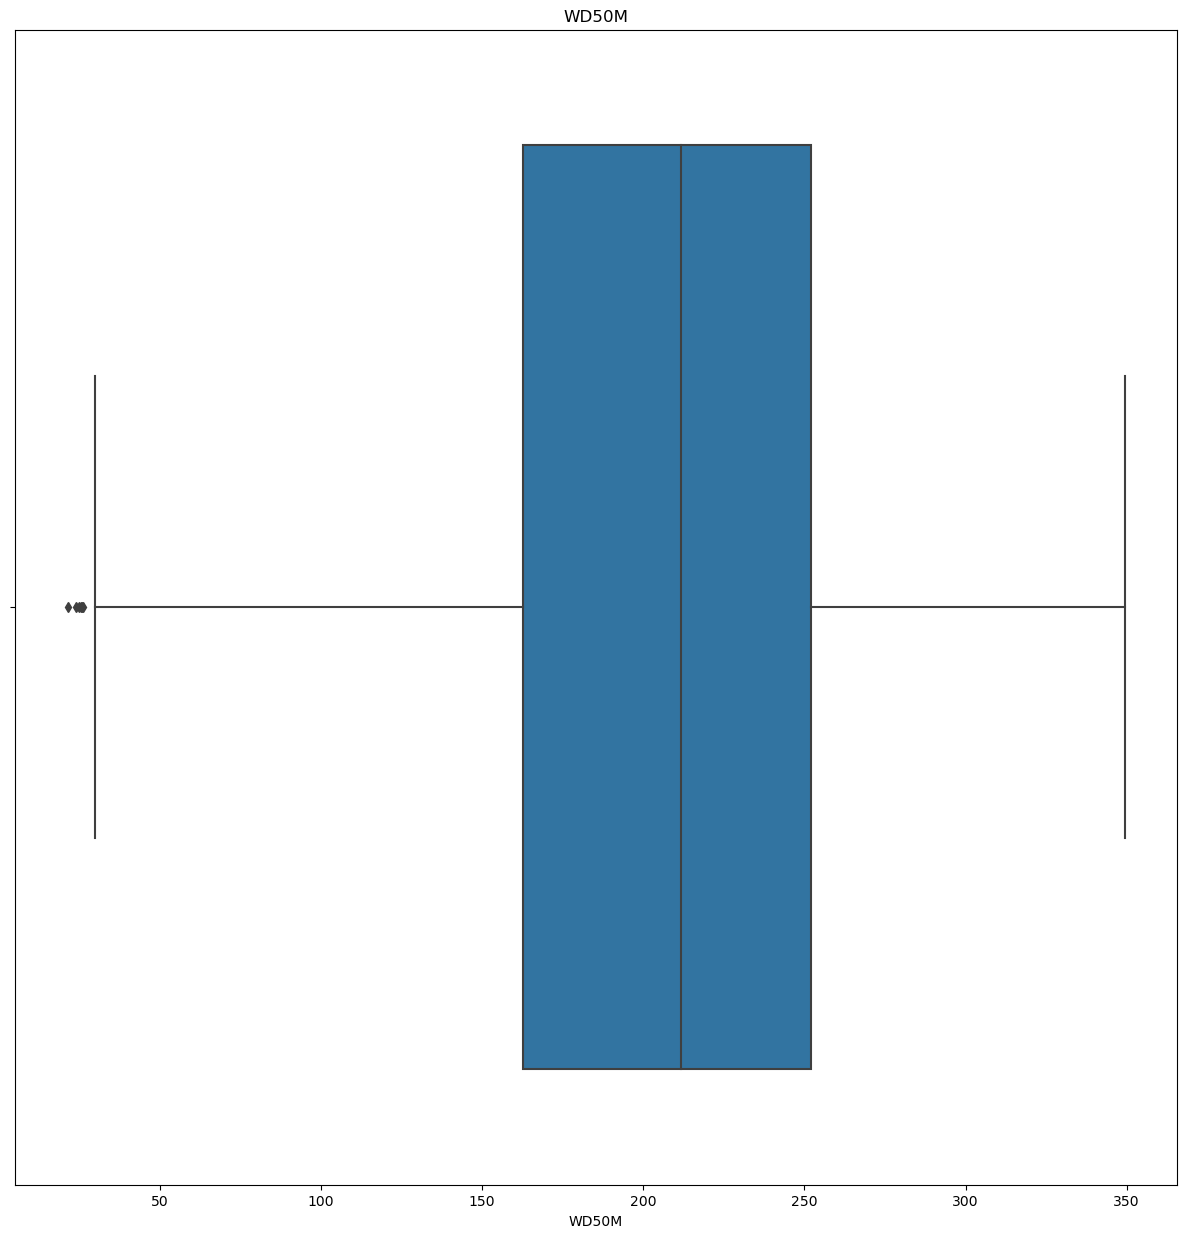

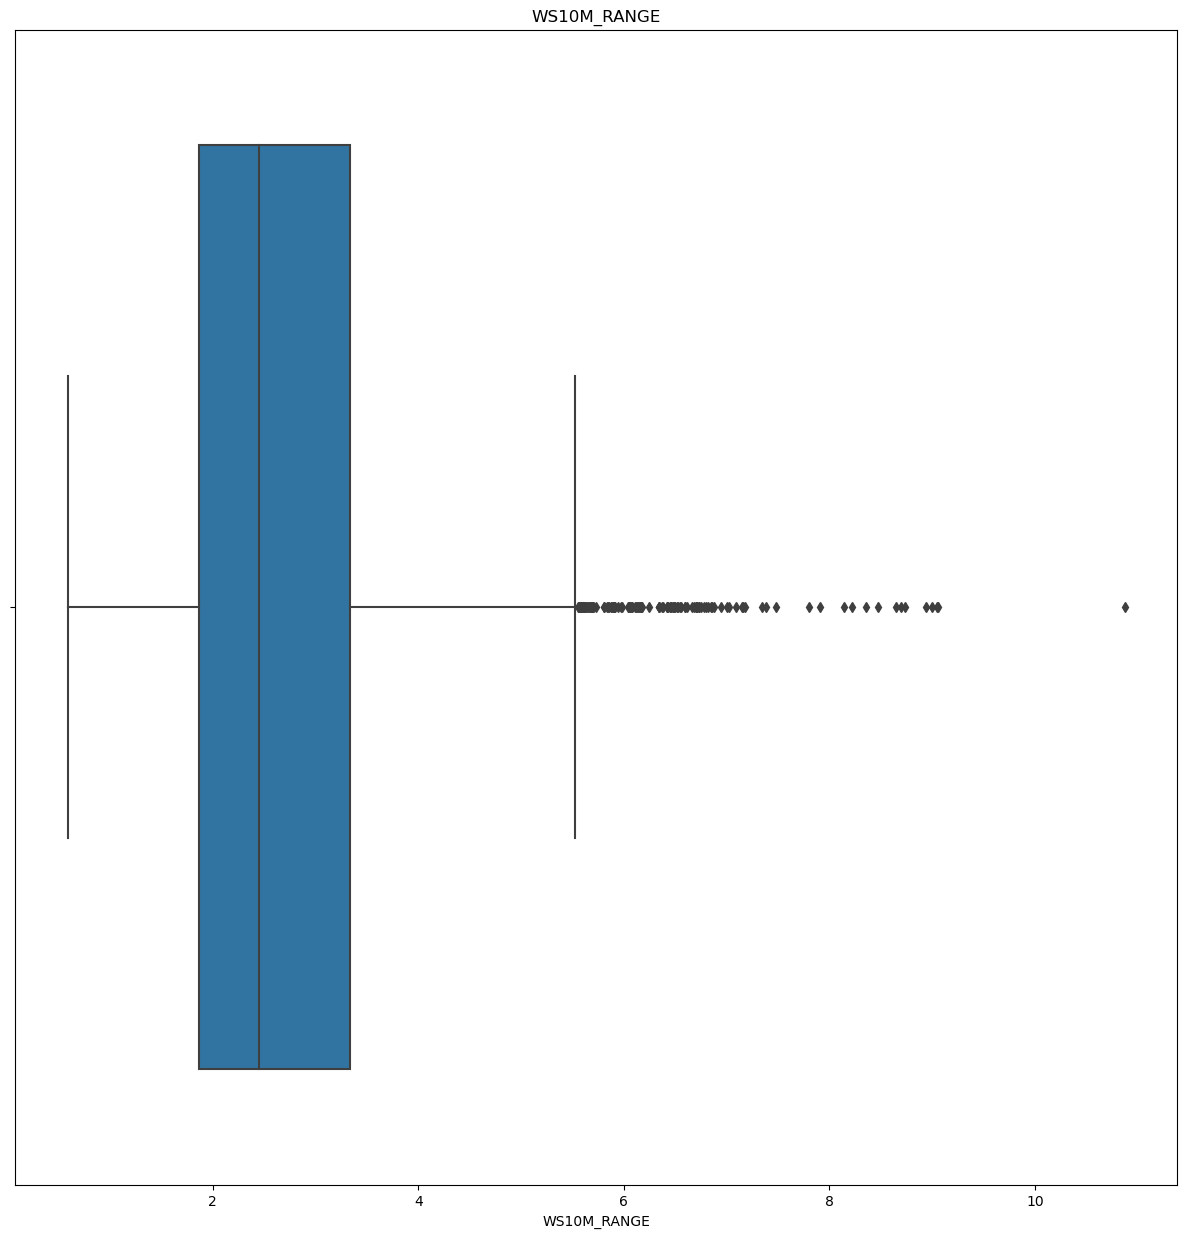

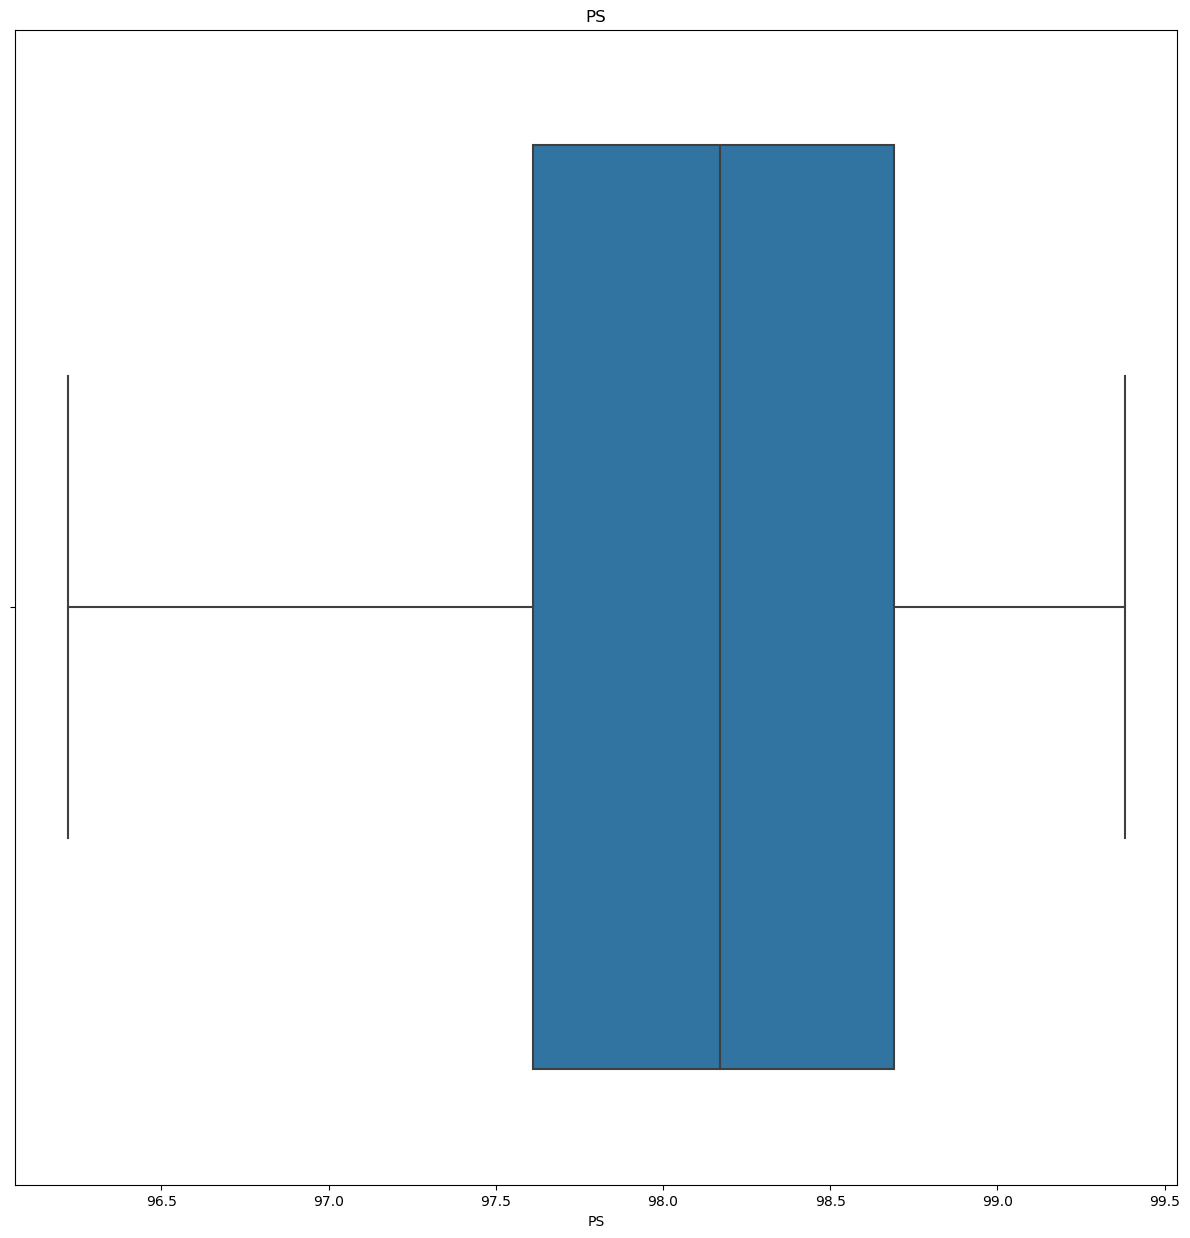

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS2M"].unique()))


[17.81 14.9  13.65 ... 24.05 29.67 31.7 ]
<class 'numpy.ndarray'>
[0.   0.01 0.03 ... 1.73 4.67 7.63]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


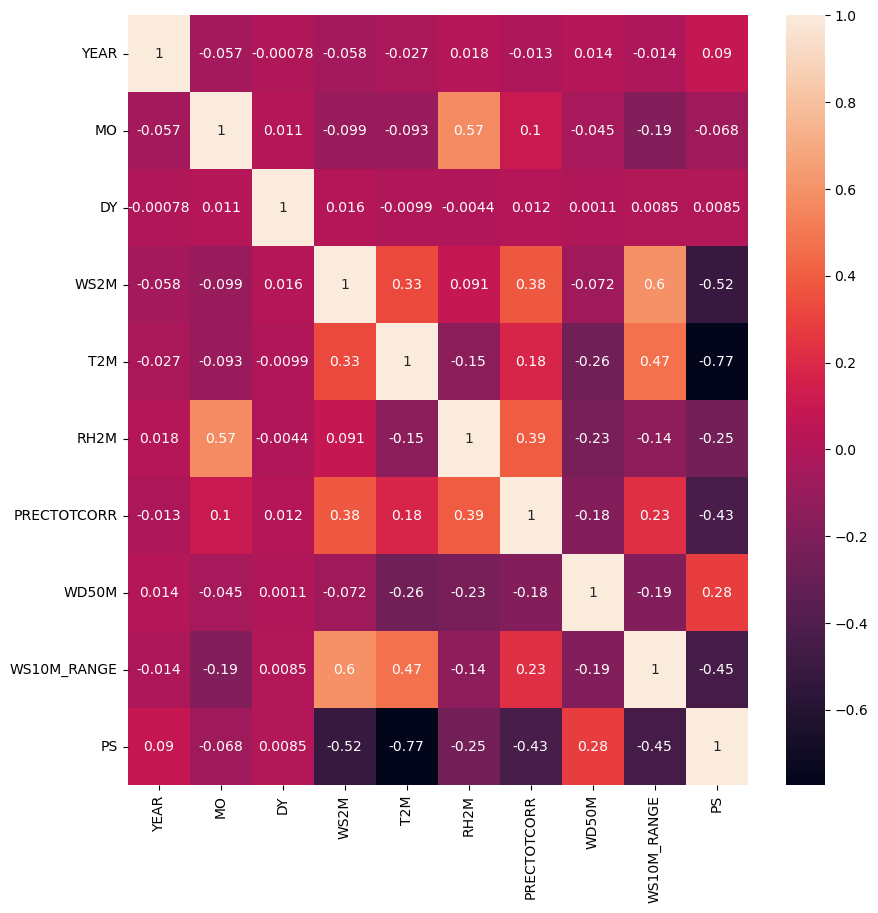

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


WS2M


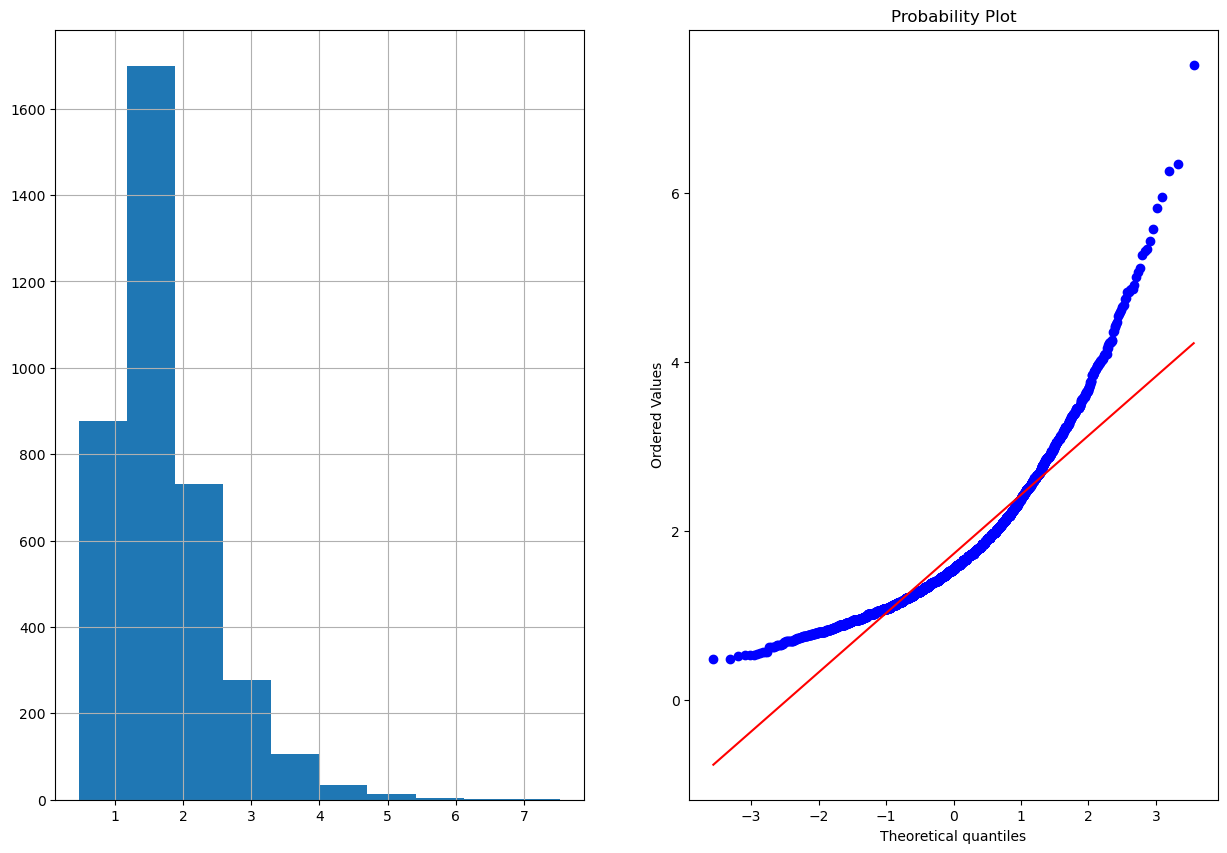

T2M


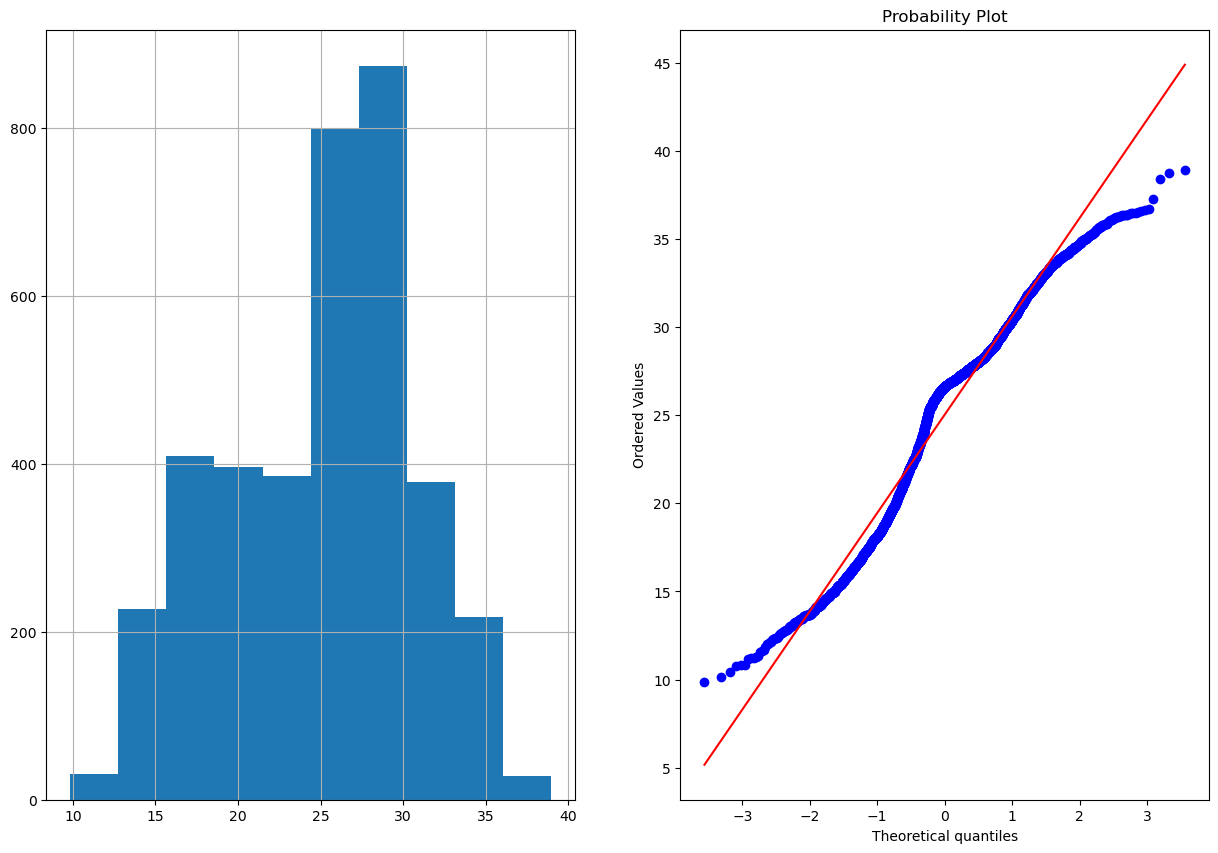

RH2M


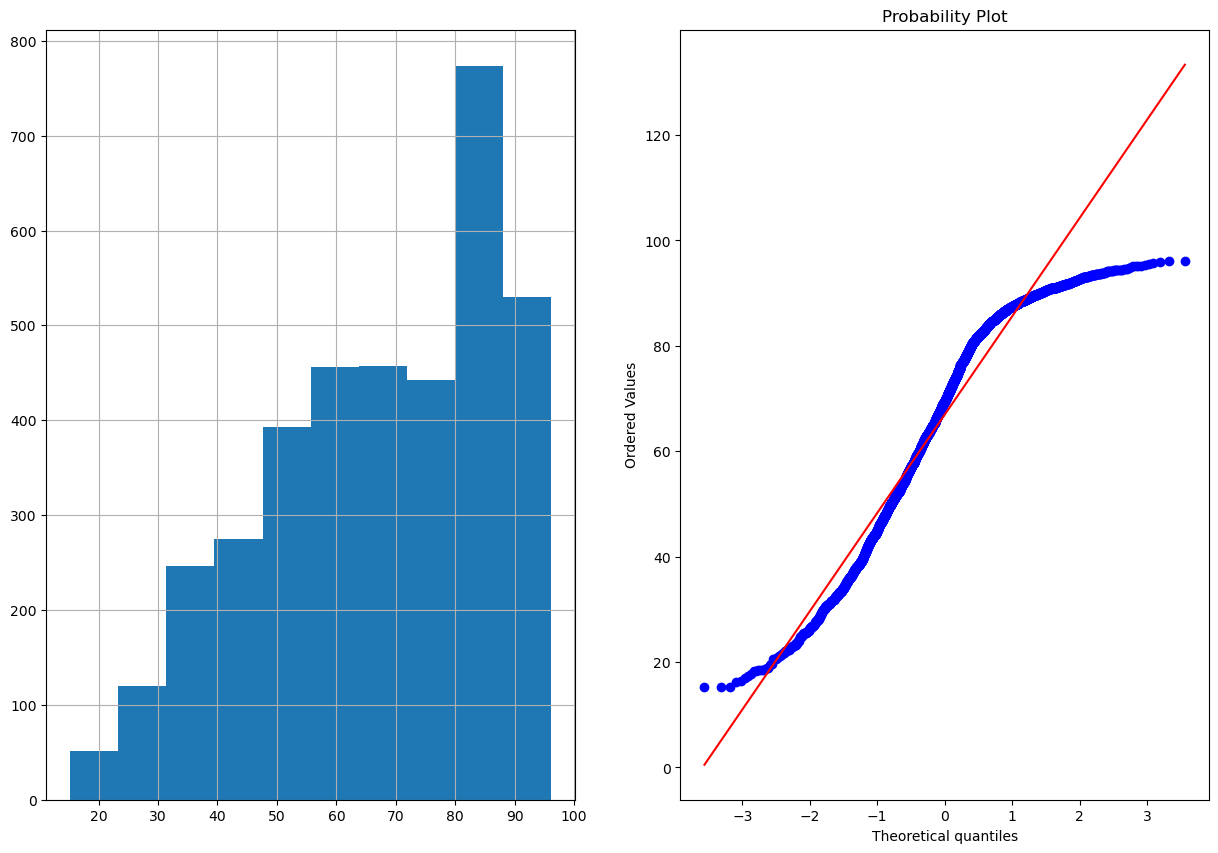

PRECTOTCORR


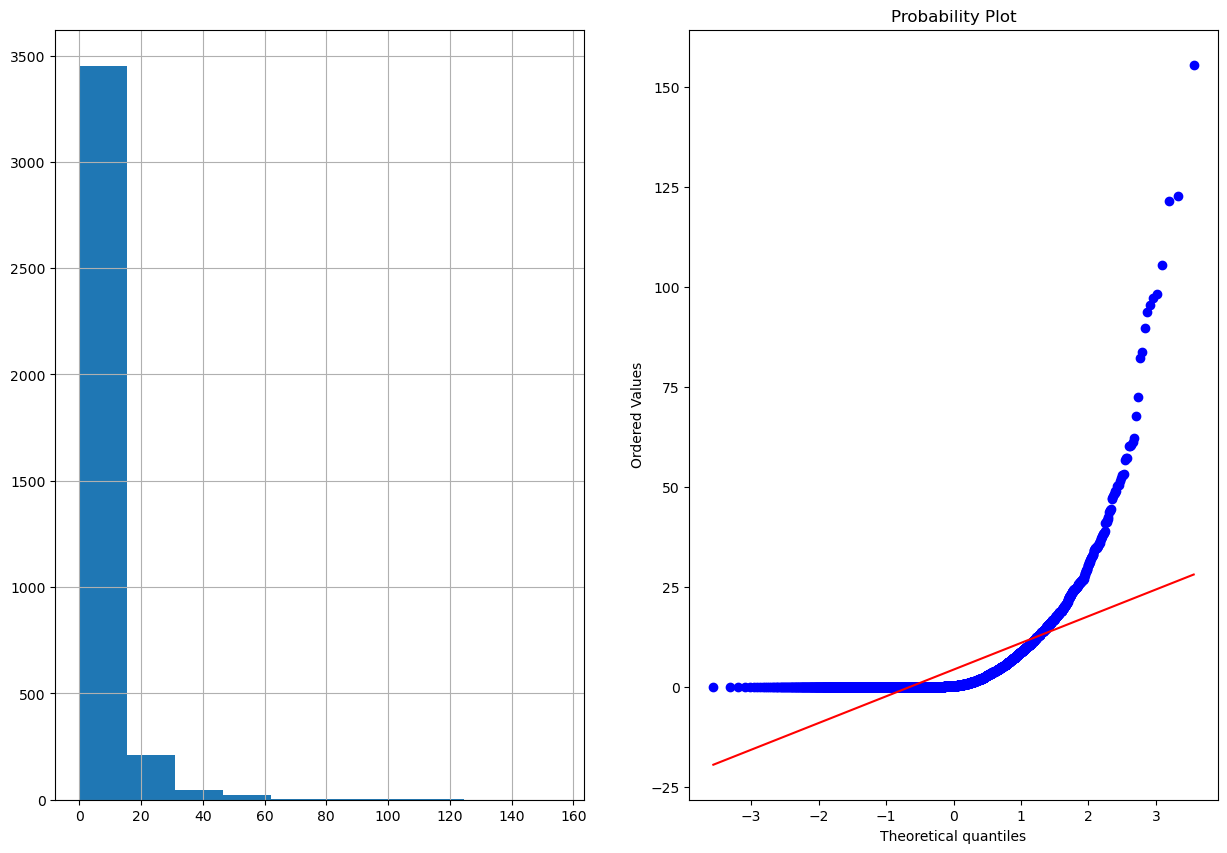

WD50M


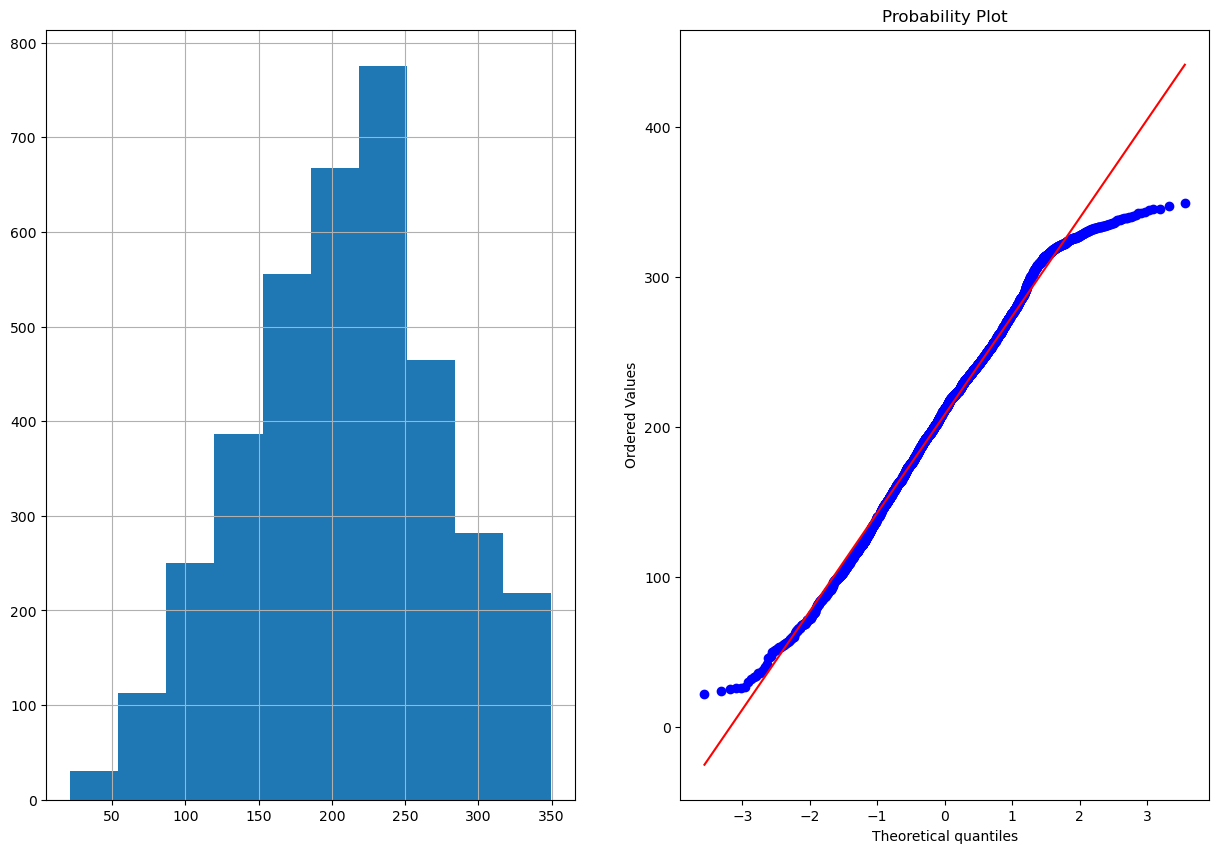

WS10M_RANGE


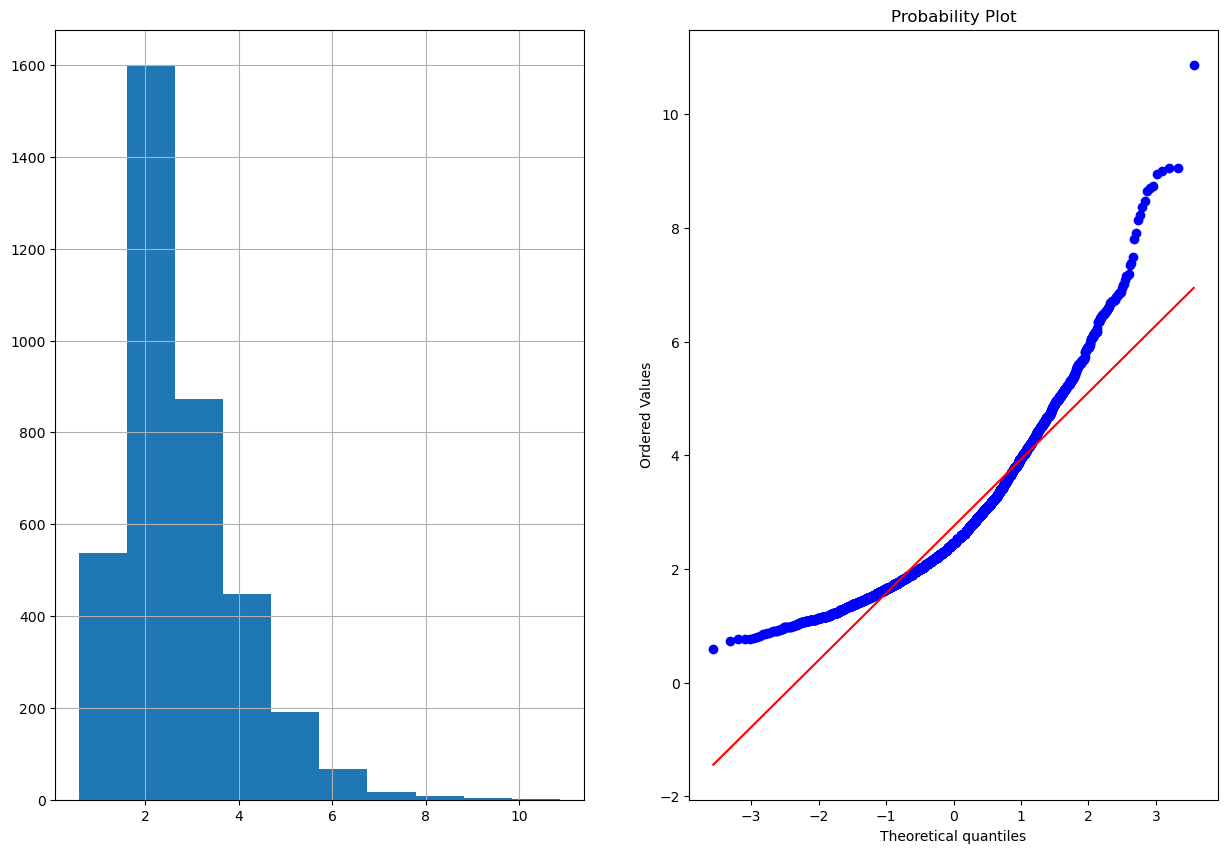

PS


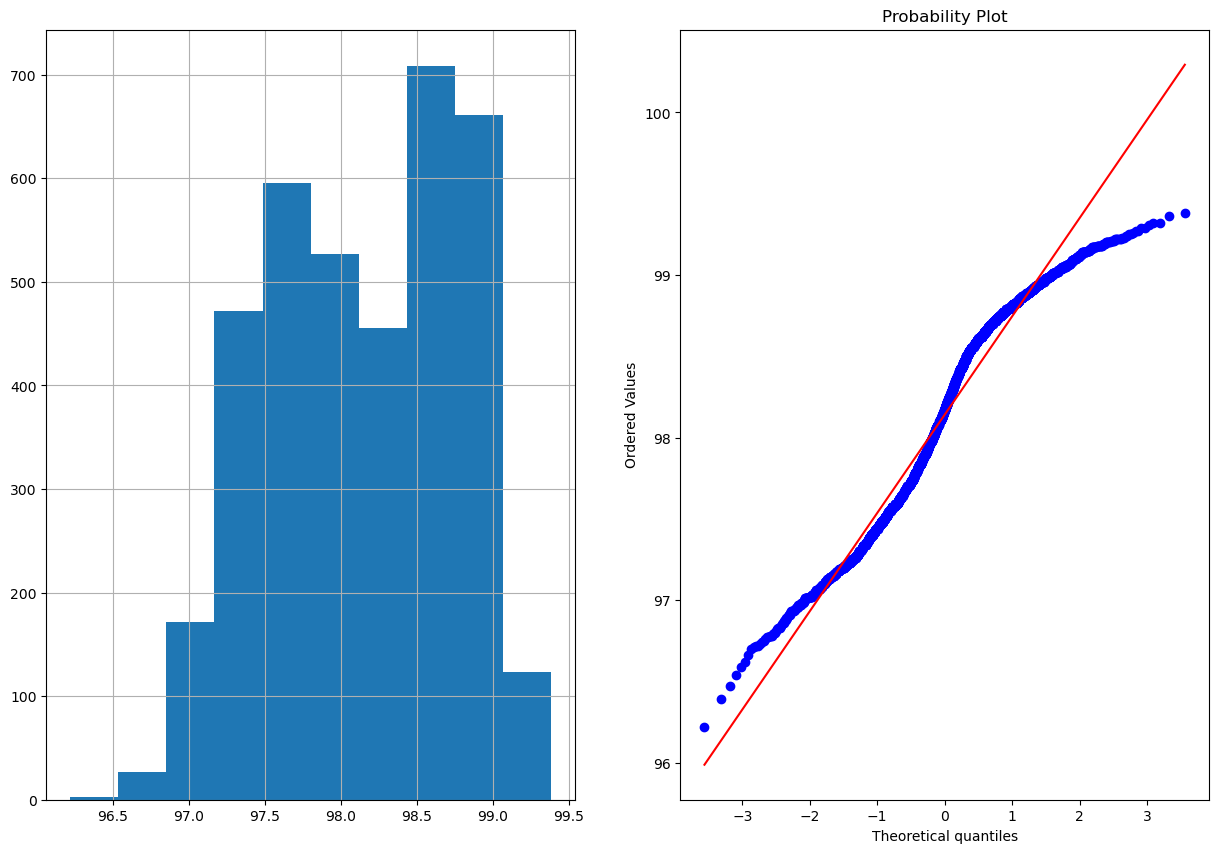

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.  , 0.01, 0.03, ..., 1.73, 4.67, 7.63])

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,17.81,1.0
1,14.90,1.0
2,13.65,1.0
3,12.84,1.0
4,13.43,1.0
...,...,...
3738,28.87,1.0
3739,29.33,1.0
3740,30.60,1.0
3741,31.90,1.0


In [24]:
d7=d['DY']

In [25]:
d8=d['MO']

In [26]:
d9=d['YEAR']

In [27]:
d10 = pd.concat([d4, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,DY
0,17.81,1.0,1
1,14.90,1.0,2
2,13.65,1.0,3
3,12.84,1.0,4
4,13.43,1.0,5
...,...,...,...
3738,28.87,1.0,27
3739,29.33,1.0,28
3740,30.60,1.0,29
3741,31.90,1.0,30


In [28]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,DY,MO
0,17.81,1.0,1,1
1,14.90,1.0,2,1
2,13.65,1.0,3,1
3,12.84,1.0,4,1
4,13.43,1.0,5,1
...,...,...,...,...
3738,28.87,1.0,27,3
3739,29.33,1.0,28,3
3740,30.60,1.0,29,3
3741,31.90,1.0,30,3


In [29]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,DY,MO,YEAR
0,17.81,1.0,1,1,2011
1,14.90,1.0,2,1,2011
2,13.65,1.0,3,1,2011
3,12.84,1.0,4,1,2011
4,13.43,1.0,5,1,2011
...,...,...,...,...,...
3738,28.87,1.0,27,3,2021
3739,29.33,1.0,28,3,2021
3740,30.60,1.0,29,3,2021
3741,31.90,1.0,30,3,2021


In [30]:
d12

,T2M,PRECTOTCORR,DY,MO,YEAR
0,17.81,1.0,1,1,2011
1,14.90,1.0,2,1,2011
2,13.65,1.0,3,1,2011
3,12.84,1.0,4,1,2011
4,13.43,1.0,5,1,2011
...,...,...,...,...,...
3738,28.87,1.0,27,3,2021
3739,29.33,1.0,28,3,2021
3740,30.60,1.0,29,3,2021
3741,31.90,1.0,30,3,2021


In [31]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [32]:
d13=d['RH2M'].copy()

In [33]:
d14=d['WD50M'].copy()

In [34]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M
0,17.81,1.0,1,1,2011,67.12
1,14.90,1.0,2,1,2011,53.88
2,13.65,1.0,3,1,2011,53.81
3,12.84,1.0,4,1,2011,56.19
4,13.43,1.0,5,1,2011,52.44
...,...,...,...,...,...,...
3738,28.87,1.0,27,3,2021,25.81
3739,29.33,1.0,28,3,2021,35.44
3740,30.60,1.0,29,3,2021,32.56
3741,31.90,1.0,30,3,2021,21.62


In [35]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M
0,17.81,1.0,1,1,2011,67.12,316.62
1,14.90,1.0,2,1,2011,53.88,231.12
2,13.65,1.0,3,1,2011,53.81,270.38
3,12.84,1.0,4,1,2011,56.19,285.75
4,13.43,1.0,5,1,2011,52.44,266.38
...,...,...,...,...,...,...,...
3738,28.87,1.0,27,3,2021,25.81,163.69
3739,29.33,1.0,28,3,2021,35.44,158.62
3740,30.60,1.0,29,3,2021,32.56,224.44
3741,31.90,1.0,30,3,2021,21.62,268.69


In [36]:
d17=d['WS2M'].copy()

In [37]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,17.81,1.0,1,1,2011,67.12,316.62,2.61
1,14.90,1.0,2,1,2011,53.88,231.12,1.73
2,13.65,1.0,3,1,2011,53.81,270.38,1.66
3,12.84,1.0,4,1,2011,56.19,285.75,1.73
4,13.43,1.0,5,1,2011,52.44,266.38,1.55
...,...,...,...,...,...,...,...,...
3738,28.87,1.0,27,3,2021,25.81,163.69,1.34
3739,29.33,1.0,28,3,2021,35.44,158.62,1.35
3740,30.60,1.0,29,3,2021,32.56,224.44,1.91
3741,31.90,1.0,30,3,2021,21.62,268.69,2.80


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

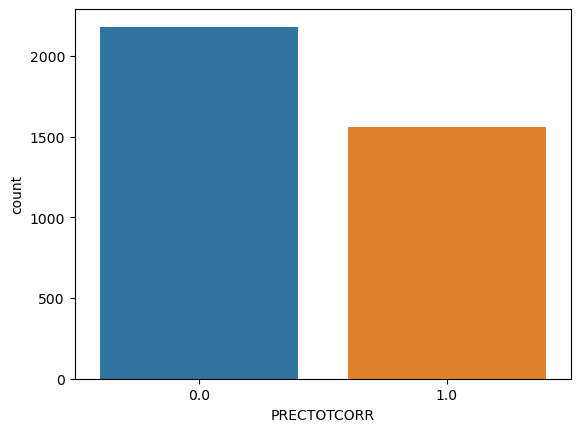

In [38]:
sns.countplot(d18["PRECTOTCORR"])

In [39]:
d18.to_csv("Jamsedpur-1.csv")

In [40]:
d18

,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,17.81,1.0,1,1,2011,67.12,316.62,2.61
1,14.90,1.0,2,1,2011,53.88,231.12,1.73
2,13.65,1.0,3,1,2011,53.81,270.38,1.66
3,12.84,1.0,4,1,2011,56.19,285.75,1.73
4,13.43,1.0,5,1,2011,52.44,266.38,1.55
...,...,...,...,...,...,...,...,...
3738,28.87,1.0,27,3,2021,25.81,163.69,1.34
3739,29.33,1.0,28,3,2021,35.44,158.62,1.35
3740,30.60,1.0,29,3,2021,32.56,224.44,1.91
3741,31.90,1.0,30,3,2021,21.62,268.69,2.80
